In [1]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

#https://github.com/MIT-LCP/gossis

In [2]:
# Ler o arquivo CSV com pandas
df = pd.read_csv('dataset.csv')

# Escrever o DataFrame em um arquivo Parquet
table = pa.Table.from_pandas(df)
pq.write_table(table, 'dataset.parquet')


In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [5]:
df.shape

(91713, 85)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [7]:
#lista todas as colunas que tem valor nulo e ordena da lista com mais valores para a com menos
# print(df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) > 0])
null_counts = df.isnull().sum().sort_values(ascending=False)
print(null_counts[null_counts > 0].index.tolist())


['Unnamed: 83', 'd1_potassium_max', 'd1_potassium_min', 'h1_mbp_noninvasive_min', 'h1_mbp_noninvasive_max', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'h1_diasbp_noninvasive_min', 'h1_diasbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'h1_sysbp_noninvasive_max', 'd1_glucose_min', 'd1_glucose_max', 'h1_mbp_max', 'h1_mbp_min', 'h1_resprate_min', 'h1_resprate_max', 'age', 'h1_spo2_min', 'h1_spo2_max', 'temp_apache', 'h1_diasbp_min', 'h1_diasbp_max', 'h1_sysbp_min', 'h1_sysbp_max', 'bmi', 'h1_heartrate_min', 'h1_heartrate_max', 'weight', 'd1_temp_max', 'd1_temp_min', 'gcs_verbal_apache', 'gcs_motor_apache', 'gcs_eyes_apache', 'apache_2_diagnosis', 'apache_3j_bodysystem', 'apache_2_bodysystem', 'd1_mbp_noninvasive_min', 'd1_mbp_noninvasive_max', 'ethnicity', 'height', 'resprate_apache', 'apache_3j_diagnosis', 'd1_diasbp_noninvasive_min', 'd1_diasbp_noninvasive_max', 'gcs_unable_apache', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'map_apache', 'heart_rate_apa

In [8]:
null_counts = df.isnull().sum().sort_values(ascending=False)
for column, count in null_counts.items():
    if count > 0:
        print(f"{column}: {count} ")


Unnamed: 83: 91713 
d1_potassium_max: 9585 
d1_potassium_min: 9585 
h1_mbp_noninvasive_min: 9084 
h1_mbp_noninvasive_max: 9084 
apache_4a_hospital_death_prob: 7947 
apache_4a_icu_death_prob: 7947 
h1_diasbp_noninvasive_min: 7350 
h1_diasbp_noninvasive_max: 7350 
h1_sysbp_noninvasive_min: 7341 
h1_sysbp_noninvasive_max: 7341 
d1_glucose_min: 5807 
d1_glucose_max: 5807 
h1_mbp_max: 4639 
h1_mbp_min: 4639 
h1_resprate_min: 4357 
h1_resprate_max: 4357 
age: 4228 
h1_spo2_min: 4185 
h1_spo2_max: 4185 
temp_apache: 4108 
h1_diasbp_min: 3619 
h1_diasbp_max: 3619 
h1_sysbp_min: 3611 
h1_sysbp_max: 3611 
bmi: 3429 
h1_heartrate_min: 2790 
h1_heartrate_max: 2790 
weight: 2720 
d1_temp_max: 2324 
d1_temp_min: 2324 
gcs_verbal_apache: 1901 
gcs_motor_apache: 1901 
gcs_eyes_apache: 1901 
apache_2_diagnosis: 1662 
apache_3j_bodysystem: 1662 
apache_2_bodysystem: 1662 
d1_mbp_noninvasive_min: 1479 
d1_mbp_noninvasive_max: 1479 
ethnicity: 1395 
height: 1334 
resprate_apache: 1234 
apache_3j_diagnosis

In [9]:
df = df.drop(['Unnamed: 83'], axis = 1)

In [10]:
dic = {
    'encounter_id': 'id_ncontro',
    'patient_id': 'id_aciente',
    'hospital_id': 'id_hospital',
    'age': 'idade',
    'bmi': 'imc',
    'elective_surgery': 'cirurgia_eletiva',
    'ethnicity': 'etnia',
    'gender': 'genero',
    'height': 'altura',
    'icu_admit_source': 'fonte_admissao_uti',
    'icu_id': 'id_uti',
    'icu_stay_type': 'tipo_estadia_uti',
    'icu_type': 'tipo_uti',
    'pre_icu_los_days': 'dias_de_permanencia_pre_uti',
    'weight': 'peso',
    'apache_2_diagnosis': 'diagnostico_pache_2',
    'apache_3j_diagnosis': 'diagnostico_apache_3j',
    'apache_post_operative': 'apache_pos_operatorio',
    'arf_apache': 'arf_apache',
    'gcs_eyes_apache': 'gcs_olhos_apache',
    'gcs_motor_apache': 'gcs_motor_apache',
    'gcs_unable_apache': 'gcs_incapaz_apache',
    'gcs_verbal_apache': 'gcs_verbal_pache',
    'heart_rate_apache': 'frequencia_cardiaca_apache',
    'intubated_apache': 'intubado_apache',
    'map_apache': 'map_apache',
    'resprate_apache': 'frequencia_respiratoria_pache',
    'temp_apache': 'temperatura_apache',
    'ventilated_apache': 'ventilado_apache',
    'd1_diasbp_max': 'd1_pressao_arterial_diastolica_maxima',
    'd1_diasbp_min': 'd1_pressao_arterial_diastolica_minima',
    'd1_diasbp_noninvasive_max': 'd1_pressao_arterial_diastolica_nao_invasiva_maxima',
    'd1_diasbp_noninvasive_min': 'd1_pressao_arterial_diastólica_nao_invasiva_minima',
    'd1_heartrate_max': 'd1_frequencia_cardiaca_maxima',
    'd1_heartrate_min': 'd1_frequencia_cardiaca_minima',
    'd1_mbp_max': 'd1_pressao_arterial_media_maxima',
    'd1_mbp_min': 'd1_pressao_arterial_media_minima',
    'd1_mbp_noninvasive_max': 'd1_pressao_arterial_media_nao_invasiva_maxima',
    'd1_mbp_noninvasive_min': 'd1_pressao_arterial_media_nao_invasiva_minima',
    'd1_resprate_max': 'd1_frequencia_respiratoria_maxima',
    'd1_resprate_min': 'd1_frequencia_respiratoria_minima',
    'd1_spo2_min': 'd1_spO2_minimo',
    'd1_spo2_max': 'd1_spO2_maximo',
    'd1_sysbp_min': 'd1_pressao_arterial_sistolica_minima',
    'd1_sysbp_max': 'd1_pressao_arterial_sistolica_maxima',
    'd1_sysbp_noninvasive_min': 'd1_pressao_arterial_sistolica_nao_invasiva_minima',
    'd1_sysbp_noninvasive_max': 'd1_pressao_arterial_sistolica_nao_invasiva_maxima',
    'd1_temp_min': 'd1_temperatura_minima',
    'd1_temp_max': 'd1_temperatura_maxima',
    'h1_diasbp_min': 'h1_ressao_arterial_iastolica_minima',
    'h1_diasbp_max': 'h1_pressão_arterial_diastolica_maxima',
    'h1_diasbp_noninvasive_min': 'h1_pressao_arterial_diastolica_nao_invasiva_minima',
    'h1_diasbp_noninvasive_max': 'h1_pressao_arterial_diastolica_nao_invasiva_maxima',
    'h1_heartrate_min': 'h1_requencia_cardiaca_minima',
    'h1_heartrate_max': 'h1_frequencia_cardiaca_maxima',
    'h1_mbp_min': 'h1_pressao_arterial_media_minima',
    'h1_mbp_max': 'h1_pressao_arterial_media_maxima',
    'h1_mbp_noninvasive_min': 'h1_pressao_arterial_media_nao_invasiva_minima',
    'h1_mbp_noninvasive_max': 'h1_pressao_arterial_media_nao_invasiva_maxima',
    'h1_resprate_min': 'h1_frequencia_respiratoria_minima',
    'h1_resprate_max': 'h1_frequencia_respiratoria_maxima',
    'h1_spo2_min': 'h1_spO2_minimo',
    'h1_spo2_max': 'h1_spO2_maximo',
    'h1_sysbp_min': 'h1_pressao_arterial_sistolica_minima',
    'h1_sysbp_max': 'h1_pressao_arterial_sistolica_maxima',
    'h1_sysbp_noninvasive_min': 'h1_pressão_arterial_sistolica_nao_invasiva_minima',
    'h1_sysbp_noninvasive_max': 'h1_pressao_arterial_sistolica_nao_invasiva_maxima',
    'd1_glucose_min': 'd1_glicose_minima',
    'd1_glucose_max': 'd1_glicose_maxima',
    'd1_potassium_min': 'd1_potassio_minimo',
    'd1_potassium_max': 'd1_potassio_maximo',
    'apache_4a_hospital_death_prob': 'probabilidade_morte_no_hospital_(apache_4a)',
    'apache_4a_icu_death_prob': 'probabilidade_morte_na_uti_(apache_4a)',
    'aids': 'aids',
    'cirrhosis': 'cirrose',
    'diabetes_mellitus': 'diabetes_mellitus',
    'hepatic_failure': 'insuficiencia_hepatica',
    'immunosuppression': 'imunossupressao',
    'leukemia': 'leucemia',
    'lymphoma': 'linfoma',
    'solid_tumor_with_metastasis': 'tumor_solido_com_metastase',
    'apache_3j_bodysystem': 'sistema_corporal_apache_3j',
    'apache_2_bodysystem': 'sistema_corporal_apache_2',
    'hospital_death': 'morte_hospital'}

In [11]:
df = df.rename(columns=dic)
df.columns


Index(['id_ncontro', 'id_aciente', 'id_hospital', 'idade', 'imc',
       'cirurgia_eletiva', 'etnia', 'genero', 'altura', 'fonte_admissao_uti',
       'id_uti', 'tipo_estadia_uti', 'tipo_uti', 'dias_de_permanencia_pre_uti',
       'peso', 'diagnostico_pache_2', 'diagnostico_apache_3j',
       'apache_pos_operatorio', 'arf_apache', 'gcs_olhos_apache',
       'gcs_motor_apache', 'gcs_incapaz_apache', 'gcs_verbal_pache',
       'frequencia_cardiaca_apache', 'intubado_apache', 'map_apache',
       'frequencia_respiratoria_pache', 'temperatura_apache',
       'ventilado_apache', 'd1_pressao_arterial_diastolica_maxima',
       'd1_pressao_arterial_diastolica_minima',
       'd1_pressao_arterial_diastolica_nao_invasiva_maxima',
       'd1_pressao_arterial_diastólica_nao_invasiva_minima',
       'd1_frequencia_cardiaca_maxima', 'd1_frequencia_cardiaca_minima',
       'd1_pressao_arterial_media_maxima', 'd1_pressao_arterial_media_minima',
       'd1_pressao_arterial_media_nao_invasiva_maxima',


In [12]:
df['genero'].value_counts()


M    49469
F    42219
Name: genero, dtype: int64

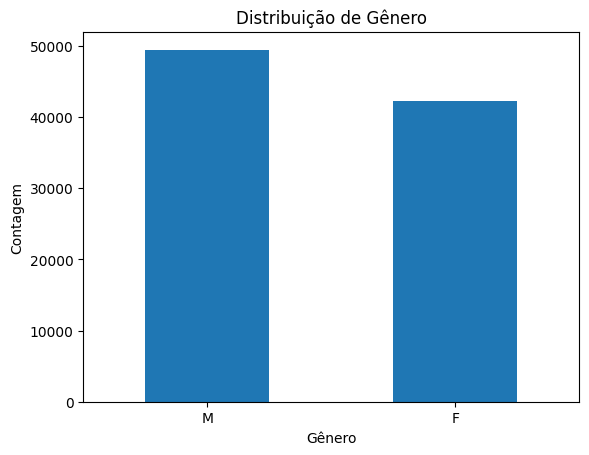

In [13]:
# Contagem de valores únicos na coluna 'Gênero'
contagem = df['genero'].value_counts()

# Plotar o gráfico de barras
contagem.plot(kind='bar')

plt.xticks(rotation=0)


# Configurações adicionais
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.title('Distribuição de Gênero')
plt.show()

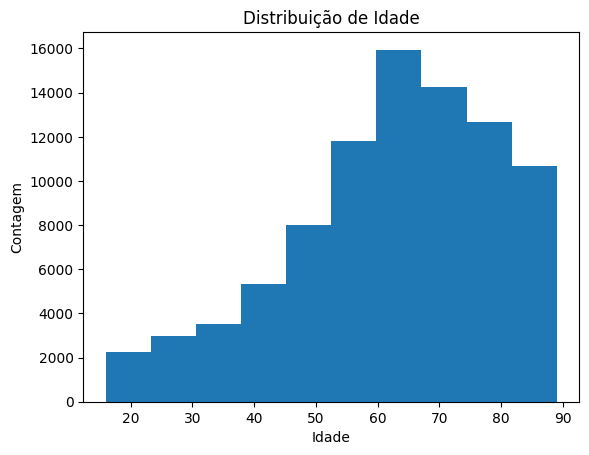

In [14]:
# histograma

# Plotar o histograma com bins determinados automaticamente
plt.hist(df['idade'])

# Configurações adicionais
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.title('Distribuição de Idade')
plt.show()

In [15]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file("relatorio.html")



/home/bianka/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_4411/3029299983.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport
Summarize dataset:  66%|██████▋   | 2450/3691 [07:42<03:17,  6.28it/s, scatter d1_pressao_arterial_media_nao_invasiva_maxima, h1_pressao_arterial_diastolica_nao_invasiva_minima]     